In [15]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

import matplotlib.pyplot as plt


In [10]:
url = "https://raw.githubusercontent.com/sharmaroshan/Heart-UCI-Dataset/master/heart.csv"
df = pd.read_csv(url)

print("Dataset Shape:", df.shape)
df.head()


Dataset Shape: (303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [16]:
df.info()
df.isnull().sum()
df["target"].value_counts()
X = df.drop("target", axis=1)
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [17]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(probability=True),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
}

results = []

for name, model in models.items():
    if name in ["Logistic Regression", "SVM"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    results.append([name, acc])

    print("====================================")
    print("Model:", name)
    print("Accuracy:", acc)
    print(classification_report(y_test, y_pred))


Model: Logistic Regression
Accuracy: 0.8032786885245902
              precision    recall  f1-score   support

           0       0.86      0.68      0.76        28
           1       0.77      0.91      0.83        33

    accuracy                           0.80        61
   macro avg       0.82      0.79      0.80        61
weighted avg       0.81      0.80      0.80        61

Model: SVM
Accuracy: 0.819672131147541
              precision    recall  f1-score   support

           0       0.90      0.68      0.78        28
           1       0.78      0.94      0.85        33

    accuracy                           0.82        61
   macro avg       0.84      0.81      0.81        61
weighted avg       0.83      0.82      0.82        61

Model: Random Forest
Accuracy: 0.819672131147541
              precision    recall  f1-score   support

           0       0.95      0.64      0.77        28
           1       0.76      0.97      0.85        33

    accuracy                          

In [18]:
!pip install xgboost -q


In [19]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    random_state=42,
    eval_metric="logloss"
)

xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

acc_xgb = accuracy_score(y_test, y_pred_xgb)
results.append(["XGBoost", acc_xgb])

print("====================================")
print("Model: XGBoost")
print("Accuracy:", acc_xgb)
print(classification_report(y_test, y_pred_xgb))


Model: XGBoost
Accuracy: 0.8032786885245902
              precision    recall  f1-score   support

           0       0.90      0.64      0.75        28
           1       0.76      0.94      0.84        33

    accuracy                           0.80        61
   macro avg       0.83      0.79      0.79        61
weighted avg       0.82      0.80      0.80        61



In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

best_model = RandomForestClassifier(n_estimators=200, random_state=42)
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

print("Best Model: Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Best Model: Random Forest
Accuracy: 0.819672131147541

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.64      0.77        28
           1       0.76      0.97      0.85        33

    accuracy                           0.82        61
   macro avg       0.85      0.81      0.81        61
weighted avg       0.85      0.82      0.81        61


Confusion Matrix:
 [[18 10]
 [ 1 32]]


In [25]:
sample = X.iloc[0:1]  # sample patient data
prediction = best_model.predict(sample)
if prediction[0] == 1:
    print("Result: Heart Disease Detected (Positive)")
else:
    print("Result: No Heart Disease Detected (Negative)")


Result: Heart Disease Detected (Positive)


In [36]:
import pandas as pd

results_df = pd.DataFrame(results, columns=["Model", "Accuracy"])
results_df = results_df.sort_values(by="Accuracy", ascending=False)

results_df.to_csv("results/model_accuracy.csv", index=False)
results_df


,Model,Accuracy
1,SVM,0.819672
2,Random Forest,0.819672
0,Logistic Regression,0.803279
3,XGBoost,0.803279


In [40]:
# Pick best model name manually (based on your results)
best_model_name = "Random Forest"   # you can change to "SVM" if you want

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Train best model + predict
if best_model_name == "Random Forest":
    best_model = RandomForestClassifier(n_estimators=200, random_state=42)
    best_model.fit(X_train, y_train)
    y_pred_best = best_model.predict(X_test)

elif best_model_name == "SVM":
    best_model = SVC(probability=True)
    best_model.fit(X_train_scaled, y_train)
    y_pred_best = best_model.predict(X_test_scaled)

else:  # Logistic Regression
    best_model = LogisticRegression(max_iter=1000)
    best_model.fit(X_train_scaled, y_train)
    y_pred_best = best_model.predict(X_test_scaled)

print("Best Model:", best_model_name)
print("y_pred_best created ✅")


Best Model: Random Forest
y_pred_best created ✅


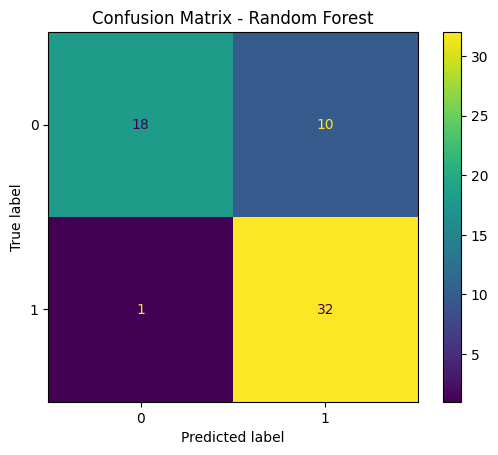

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_best)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title(f"Confusion Matrix - {best_model_name}")
plt.show()


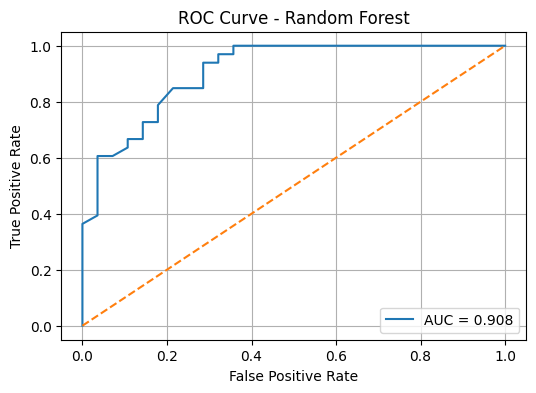

ROC-AUC Score: 0.9080086580086579
Saved: results/roc_curve.png


In [43]:
import os
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

os.makedirs("results", exist_ok=True)

# Probability of class 1 (Disease)
y_prob = best_model.predict_proba(X_test)[:, 1]

# ROC values
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# AUC score
auc_score = roc_auc_score(y_test, y_prob)

# Plot ROC Curve
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.title("ROC Curve - Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)

# Save image
plt.savefig("results/roc_curve.png")
plt.show()

print("ROC-AUC Score:", auc_score)
print("Saved: results/roc_curve.png")
